# Hand_Written_Recognition

### 1. Screen capture
### 2. Generate dataset and load it
### 3. Fit the model and load it
### 4. Prediction of image drawn in paint

In [104]:
pip install pyscreenshot

Note: you may need to restart the kernel to use updated packages.


In [105]:
import pyscreenshot as ImageGrab

In [106]:
import time

In [107]:
images_folder="D:\ML\Captured_images/9/"
for i in range(0,10):
    time.sleep(8)#delay 8 seconds
    im=ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1,x2,y2
    print("saved ......",i)
    im.save(images_folder+str(i)+'.png')
    print("clear screen and redraw now")
    

saved ...... 0
clear screen and redraw now
saved ...... 1
clear screen and redraw now
saved ...... 2
clear screen and redraw now
saved ...... 3
clear screen and redraw now
saved ...... 4
clear screen and redraw now
saved ...... 5
clear screen and redraw now
saved ...... 6
clear screen and redraw now
saved ...... 7
clear screen and redraw now
saved ...... 8
clear screen and redraw now
saved ...... 9
clear screen and redraw now


## 2. Generate dataset and load

In [108]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [109]:
import csv
import glob
import cv2
header=["label"]
for i in range(0,784):
    header.append("pixel"+str(i))
with open('dataset.csv','a') as f:
    writer=csv.writer(f)
    writer.writerow(header)
for label in range(10):
    dirlist = glob.glob("captured_images/" + str(label) + "/*.png")
    for img_path in dirlist:
        im = cv2.imread(img_path)
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
        roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)
        data =[]
        data.append(label)
        rows, cols = roi.shape
        ## add pixel one by one into the data array
        for i in range(rows):
            for j in range(cols):
                k=roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
        with open('dataset.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)
                
            
        
        

In [110]:
import pandas as pd

# Load your data into the DataFrame
df = pd.read_csv('dataset.csv')

# Display the first few rows of the DataFrame
print(df.head())


  label pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8  ...  \
0   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
1     0      1      1      1      1      1      1      1      1      1  ...   
2   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
3     0      1      1      1      1      1      1      1      1      1  ...   
4   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   

  pixel774 pixel775 pixel776 pixel777 pixel778 pixel779 pixel780 pixel781  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1        0        0        0        0        1        1        0        0   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3        0        0        0        0        1        1        0        0   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  pixel782 pixel783  
0      NaN      NaN  
1        0        

#### Load the dataset
    

In [111]:
import pandas as pd
from sklearn.utils import shuffle
import pandas as pd
data = pd.read_csv('D:/ML/dataset.csv')
data = shuffle(data)
print(data)
print(data.head())  # Display the first few rows of the DataFrame





    label pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8  ...  \
285     7      1      1      1      1      1      1      1      1      1  ...   
55      5      1      1      1      1      1      1      1      1      1  ...   
241     9      0      0      0      0      0      0      0      0      0  ...   
102     3      1      1      1      1      1      1      1      1      1  ...   
136     6      1      1      1      1      1      1      1      1      1  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
207     4      1      1      1      1      1      1      1      1      1  ...   
261     3      1      1      1      1      1      1      1      1      1  ...   
143     0      1      1      1      1      1      1      1      1      1  ...   
277     6      1      1      1      1      1      1      1      1      1  ...   
97    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   

    pixel774 pixel775 pixel

In [112]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [113]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


#### Sepreration of dependent and independent variable

In [114]:
import pandas as pd
# Load the CSV file into a DataFrame
data = pd.read_csv('dataset.csv')
# Verify the type of 'data' to ensure it's a DataFrame
print(type(data))  # Should print <class 'pandas.core.frame.DataFrame'>
# Assuming 'data' is now a DataFrame, you can drop the 'label' column
X = data.drop(['label'], axis=1)
Y = data['label']
# Display the first few rows of X and Y to verify
print(X.head())
print(Y.head())

<class 'pandas.core.frame.DataFrame'>
  pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8 pixel9  ...  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
1      1      1      1      1      1      1      1      1      1      1  ...   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
3      1      1      1      1      1      1      1      1      1      1  ...   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   

  pixel774 pixel775 pixel776 pixel777 pixel778 pixel779 pixel780 pixel781  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1        0        0        0        0        1        1        0        0   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3        0        0        0        0        1        1        0        0   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  pixel782 pixel78

#### Preview of one image using matplotlib

In [115]:
print(X.index)

RangeIndex(start=0, stop=308, step=1)


In [116]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('dataset.csv')

# Define the features and labels
X = data.drop(['label'], axis=1)
Y = data['label']


In [117]:
print(X.head())
print(Y.head())

  pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8 pixel9  ...  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
1      1      1      1      1      1      1      1      1      1      1  ...   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
3      1      1      1      1      1      1      1      1      1      1  ...   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   

  pixel774 pixel775 pixel776 pixel777 pixel778 pixel779 pixel780 pixel781  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1        0        0        0        0        1        1        0        0   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3        0        0        0        0        1        1        0        0   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  pixel782 pixel783  
0      NaN      NaN  
1        0  

In [118]:
import os

file_path = "dataset.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("File loaded successfully")
else:
    print("Error: File not found!")


File loaded successfully


In [119]:
from sklearn.model_selection import train_test_split
# Ensure dataset is not empty
if df.empty:
    raise ValueError("Dataset is empty! Please check the file.")
# Define features and target
X = df.drop(columns=["label"])
y = df["label"]
# Perform stratified splitting
#train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#print(train_y.value_counts())  # Verify that multiple classes exist


In [120]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Train shape:", train_x.shape, train_Y.shape)
print("Test shape:", test_x.shape, test_Y.shape)

Train shape: (246, 784) (246,)
Test shape: (62, 784) (62,)


In [121]:
import pandas as pd

# Convert all columns to numeric, forcing errors to NaN
train_x = train_x.apply(pd.to_numeric, errors='coerce')
test_x = test_x.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
train_x.dropna(inplace=True)
test_x.dropna(inplace=True)

# Ensure train_y and test_y do not contain NaN values
train_y.dropna(inplace=True)
test_y.dropna(inplace=True)

# Verify the data types and shapes
print(train_x.dtypes)
print(test_x.dtypes)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

pixel0      float64
pixel1      float64
pixel2      float64
pixel3      float64
pixel4      float64
             ...   
pixel779    float64
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
Length: 784, dtype: object
pixel0      float64
pixel1      float64
pixel2      float64
pixel3      float64
pixel4      float64
             ...   
pixel779    float64
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
Length: 784, dtype: object
(186, 784) (139,)
(50, 784) (35,)


In [122]:
# Drop rows with NaN values in 'test_Y' and 'train_Y'
test_Y = test_Y.dropna()
train_Y = train_Y.dropna()

# Ensure all pixel values are numeric
test_x = test_x.apply(pd.to_numeric, errors='coerce')
train_x = train_x.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in 'test_x' and 'train_x'
test_x = test_x.dropna()
train_x = train_x.dropna()

# Verify the data types
print(test_x.dtypes)
print(train_x.dtypes)

pixel0      float64
pixel1      float64
pixel2      float64
pixel3      float64
pixel4      float64
             ...   
pixel779    float64
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
Length: 784, dtype: object
pixel0      float64
pixel1      float64
pixel2      float64
pixel3      float64
pixel4      float64
             ...   
pixel779    float64
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
Length: 784, dtype: object


#### ✅ Step 1: Check the Data

#### Run the code to see first few rows of data frame

In [123]:
print(df.head())  # Show the first few rows of the DataFrame

  label pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8  ...  \
0   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
1     0      1      1      1      1      1      1      1      1      1  ...   
2   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
3     0      1      1      1      1      1      1      1      1      1  ...   
4   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   

  pixel774 pixel775 pixel776 pixel777 pixel778 pixel779 pixel780 pixel781  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1        0        0        0        0        1        1        0        0   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3        0        0        0        0        1        1        0        0   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  pixel782 pixel783  
0      NaN      NaN  
1        0        

#### ✅ Step 2: Reload the CSV with Correct Headers


In [124]:
import pandas as pd

df = pd.read_csv("dataset.csv", header=0)  # Ensure first row is treated as headers
print(df.head())  # Check if data looks correct now


  label pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8  ...  \
0   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
1     0      1      1      1      1      1      1      1      1      1  ...   
2   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
3     0      1      1      1      1      1      1      1      1      1  ...   
4   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   

  pixel774 pixel775 pixel776 pixel777 pixel778 pixel779 pixel780 pixel781  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1        0        0        0        0        1        1        0        0   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3        0        0        0        0        1        1        0        0   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  pixel782 pixel783  
0      NaN      NaN  
1        0        

In [125]:
df = pd.read_csv("dataset.csv", header=None)  # No header


##### Manually set Column names

In [126]:
column_names = ["label"] + [f"pixel{i}" for i in range(784)]  # Assuming 784 pixel features
df.columns = column_names

#### ✅Step 3: Remove Any Non-Numeric Rows

In [127]:
df = df[pd.to_numeric(df["pixel0"], errors="coerce").notna()]  # Keep only numeric rows


In [128]:
df = df.astype(float)  # Convert entire DataFrame to float

#### ✅Step 4: Ensure Correct Feature Extraction

In [129]:
X = df.drop(columns=["label"])  # Features (all pixel values)
y = df["label"]  # Labels (digits)


#### ✅ Step5: Check Data Types

In [130]:
print(df.dtypes)


label       float64
pixel0      float64
pixel1      float64
pixel2      float64
pixel3      float64
             ...   
pixel779    float64
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
Length: 785, dtype: object


In [131]:
import pandas as pd

df = pd.read_csv("dataset.csv")  # Load dataset
print(df["label"].value_counts())  # Show class distribution


6        31
0        25
1        25
2        25
3        25
4        25
5        25
8        20
9        20
7        15
label     3
Name: label, dtype: int64


In [132]:
df = df[df["label"].map(df["label"].value_counts()) > 1]
print(df["label"].value_counts())  # Check if problem is fixed


6        31
0        25
1        25
2        25
3        25
4        25
5        25
8        20
9        20
7        15
label     3
Name: label, dtype: int64


In [133]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["label"])
y = df["label"]
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=6)
print(train_y.value_counts())  # Check class distribution in training set


6        25
2        20
3        20
0        20
5        20
4        20
1        20
8        16
9        16
7        12
label     2
Name: label, dtype: int64


In [134]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


In [135]:
import pandas as pd

df = pd.read_csv("dataset.csv")
print("Dataset shape:", df.shape)  # Check number of rows and columns
print(df.head())  # Display first few rows


Dataset shape: (308, 785)
  label pixel0 pixel1 pixel2 pixel3 pixel4 pixel5 pixel6 pixel7 pixel8  ...  \
0   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
1     0      1      1      1      1      1      1      1      1      1  ...   
2   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
3     0      1      1      1      1      1      1      1      1      1  ...   
4   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   

  pixel774 pixel775 pixel776 pixel777 pixel778 pixel779 pixel780 pixel781  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1        0        0        0        0        1        1        0        0   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3        0        0        0        0        1        1        0        0   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

  pixel782 pixel783  
0      NaN    

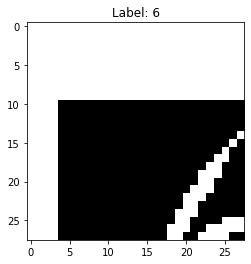

In [136]:
import pandas as pd

import matplotlib.pyplot as plt

# Ensure all data in train_x is numeric
train_x = train_x.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values that may have resulted from the conversion
train_x.dropna(inplace=True)

# Define a valid index
idx = 65  # Replace with an index that exists in train_x

# Ensure you have a valid index
if idx in train_x.index:
    img = train_x.loc[idx].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {train_Y.loc[idx]}")
    plt.show()
else:
    print(f"Index {idx} not found in the DataFrame.")

#### Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y= train_test_split(X,Y, test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [239, 308]

# 3. Fit the model SVC and also to save the model using joblib

In [ ]:
!pip check
!pip uninstall imbalanced-learn
!pip install imbalanced-learn

### train_test_split()

In [ ]:
# Drop rows with NaN values in train_x, train_y, test_x, and test_y
train_x.dropna(inplace=True)
train_y.dropna(inplace=True)
test_x.dropna(inplace=True)
test_y.dropna(inplace=True)

# Ensure train_y and test_y do not contain NaN values
train_y = train_y[train_y.notna()]
test_y = test_y[test_y.notna()]

# Verify the data types and shapes
print(train_x.dtypes)
print(test_x.dtypes)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

pixel0      object
pixel1      object
pixel2      object
pixel3      object
pixel4      object
             ...  
pixel779    object
pixel780    object
pixel781    object
pixel782    object
pixel783    object
Length: 784, dtype: object
pixel0      object
pixel1      object
pixel2      object
pixel3      object
pixel4      object
             ...  
pixel779    object
pixel780    object
pixel781    object
pixel782    object
pixel783    object
Length: 784, dtype: object
(142, 784) (142,)
(34, 784) (34,)


In [ ]:
import numpy as np

# Replace infinities with NaN
train_x.replace([np.inf, -np.inf], np.nan, inplace=True)
test_x.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
train_x.dropna(inplace=True)
test_x.dropna(inplace=True)

# Ensure train_y and test_y do not contain NaN values
train_y.dropna(inplace=True)
test_y.dropna(inplace=True)

# Verify the data types and shapes
print(train_x.dtypes)
print(test_x.dtypes)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

pixel0      object
pixel1      object
pixel2      object
pixel3      object
pixel4      object
             ...  
pixel779    object
pixel780    object
pixel781    object
pixel782    object
pixel783    object
Length: 784, dtype: object
pixel0      object
pixel1      object
pixel2      object
pixel3      object
pixel4      object
             ...  
pixel779    object
pixel780    object
pixel781    object
pixel782    object
pixel783    object
Length: 784, dtype: object
(142, 784) (142,)
(34, 784) (34,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("Dataset.csv")

# Define features and target variable
X = df.drop(columns=["label"])  # Replace with your target column name
y = df["label"]

# Split into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, train_x and train_y are defined and can be used


In [ ]:
print(train_x.shape, train_y.shape)  # Should output valid dimensions


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("dataset.csv")

# Drop rows where any element is non-numeric
df = df.apply(pd.to_numeric, errors='coerce').dropna()

# Verify the data types and shapes
print(df.dtypes)
print(df.shape)

# Define features and labels
X = df.drop(columns=["label"])
y = df["label"]

# Split into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the splits
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

label       float64
pixel0      float64
pixel1      float64
pixel2      float64
pixel3      float64
             ...   
pixel779    float64
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
Length: 785, dtype: object
(174, 785)
(139, 784) (139,)
(35, 784) (35,)


#### Calculate the accuracy

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import joblib
from imblearn.over_sampling import SMOTE
import os

# Load the CSV file into a DataFrame
try:
    data = pd.read_csv('dataset.csv')
    if data.empty:
        print("The dataset is empty. Check the file path or contents.")
    else:
        print(data.head())
except FileNotFoundError:
    print("The file 'dataset.csv' was not found. Please check the file path.")
except pd.errors.EmptyDataError:
    print("The file is empty. Please check the file contents.")
except Exception as e:
    print(f"An error occurred: {e}")

# Proceed if data is correctly loaded
if 'data' in locals() and not data.empty:
    # Check unique values and class distribution in 'label' column
    unique_labels = data['label'].unique()
    class_counts = data['label'].value_counts()
    print(f"Unique classes in 'label' column: {unique_labels}")
    print(f"Class distribution in the original data:\n{class_counts}")

    # Define features and labels
    X = data.drop(['label'], axis=1)
    Y = data['label']

    # Apply SMOTE to balance the dataset
    smote = SMOTE(random_state=42)
    X_resampled, Y_resampled = smote.fit_resample(X, Y)

    # Check class distribution in the resampled data
    resampled_class_counts = pd.Series(Y_resampled).value_counts()
    print(f"Class distribution in the resampled data:\n{resampled_class_counts}")

    # Split the resampled data into training and testing sets
    train_x, test_x, train_y, test_y = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42, stratify=Y_resampled)

    # Check class distribution in train_y
    train_class_counts = train_y.value_counts()
    print(f"Class distribution in the training data:\n{train_class_counts}")

    # Initialize the classifier
    classifier = SVC(kernel="linear", random_state=6)

    # Fit the classifier with training data
    classifier.fit(train_x, train_y)

    # Save the model with versioning
    model_dir = "model"
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    model_path = os.path.join(model_dir, "digit_recognizer_v1.pkl")
    joblib.dump(classifier, model_path)


ModuleNotFoundError: No module named 'imblearn'

In [103]:
!pip install imbalanced-learn

In [ ]:
import imblearn
print(imblearn.__version__)


In [ ]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy=",metrics.accuracy_score(prediction,test_y))


In [ ]:
from sklearn.svm import SVC

# Initialize the classifier
classifier = SVC()

# Fit the classifier with the training data
classifier.fit(train_x, train_y)

# Make predictions on the test data
prediction = classifier.predict(test_x)

# Print the predictions
print(prediction)

In [ ]:
import pandas as pd

# Convert all columns to numeric, forcing errors to NaN
train_x = train_x.apply(pd.to_numeric, errors='coerce')
test_x = test_x.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
train_x.dropna(inplace=True)
test_x.dropna(inplace=True)

# Ensure train_y and test_y do not contain NaN values
train_y.dropna(inplace=True)
test_y.dropna(inplace=True)

# Verify the data types and shapes
print(train_x.dtypes)
print(test_x.dtypes)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

In [ ]:
from sklearn.svm import SVC

classifier = SVC()  # or any other model initialization
classifier.fit(train_x, train_y)  # Make sure the model is trained

prediction = classifier.predict(test_x)


In [ ]:
# Check the lengths of train_x and train_y
print(f"Length of train_x: {len(train_x)}")
print(f"Length of train_y: {len(train_y)}")

# Ensure both have the same number of samples
if len(train_x) != len(train_y):
    # Find the common indices
    common_indices = train_x.index.intersection(train_y.index)
    
    # Filter train_x and train_y to have only the common indices
    train_x = train_x.loc[common_indices]
    train_y = train_y.loc[common_indices]

# Verify the lengths again
print(f"Length of train_x after fixing: {len(train_x)}")
print(f"Length of train_y after fixing: {len(train_y)}")

In [ ]:
import joblib

classifier = joblib.load("digit_recognizer.pkl")  # Ensure you have the correct file path
prediction = classifier.predict(test_x)


In [71]:
import joblib
import os

model_path = "model/digit_recognizer"

if os.path.exists(model_path):
    classifier = joblib.load(model_path)
    prediction = classifier.predict(test_x)
    print(prediction)
else:
    print(f"Error: The file '{model_path}' was not found. Please check the file path.")

['1' '2' '2' '1' '1' '2' '5' '6' '5' '5' '5' '5' '0' '0' '5' '0' '6' '5'
 '2' '1' '2']


# 3. Fit the model using SVC and calculate accuracy

### prediction of image drawn in paint

In [ ]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab

model = joblib.load("model/digit_recognizer")
images_folder = "img/"

while True:
    img = ImageGrab.grab(bbox=(60,170,400,500))
    img.save(images_folder + "img.png")
    im = cv2.imread(images_folder + "img.png")
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
    
    # Threshold the image
    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)
    rows, cols = roi.shape
    X = []
    for i in range(rows):
        for j in range(cols):
            k = roi[i, j]
            if k > 100:
                k = 1
            else:
                k = 0
            X.append(k)
    
    predictions = model.predict([X])
    print("Prediction:", predictions[0])
    cv2.putText(im, "Prediction is:" + str(predictions[0]), (20, 20), 0, 0.8, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result", im)
    cv2.waitKey(10000)
    if cv2.waitKey(1) == 13:  # 27 is ASCII for ESC and 13 is ASCII code for Enter
        break

cv2.destroyAllWindows()

Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 5
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Predic